# Full explanation can be found here :  https://1drv.ms/w/s!Ah4fw0Mpzkw9wSg5rcgZAfic70NG?e=CV2aJ3
 

# 1- Read the dataset and examine how many features and examples does it have


In [67]:
 #Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random


file_path = 'cars.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter=',')

# Display the first 5 rows of the DataFrame 
print(df.head())

# Get the number of features (columns) and examples (rows)
num_features = df.shape[1]
num_examples = df.shape[0]

print(f"\nNumber of features: {num_features}")
print(f"Number of examples: {num_examples}")


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  
0          70    USA  
1          70    USA  
2          70    USA  
3          70    USA  
4          70    USA  

Number of features: 8
Number of examples: 398


# 2- Check for missing values 


In [68]:

missing_values = df.isnull().sum()
print("Features with missing values:")
print(missing_values[missing_values > 0])
print("\nNumber of missing values in each feature:")
print(missing_values[missing_values > 0].to_dict())

Features with missing values:
horsepower    6
origin        2
dtype: int64

Number of missing values in each feature:
{'horsepower': 6, 'origin': 2}


# 3- Fill the missing values


In [69]:

#Fill the missing values in the 'horsepower' feature using the median
median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)

#Fill the missing values in the 'origin' feature using the mode
mode_origin = df['origin'].mode()[0]
df['origin'].fillna(mode_origin, inplace=True)

print(" The median of 'horsepower' feature is :",median_horsepower)
print(" The mode of 'origin' feature is :",mode_origin)




 The median of 'horsepower' feature is : 93.5
 The mode of 'origin' feature is : USA


In [70]:
# Check if there are any missing values

missing_values = df.isnull().sum()
if missing_values.any():

    # Print features with missing values
    print("Features with missing values:")
    print(missing_values[missing_values > 0])

    # Print the number of missing values in each feature
    print("\nNumber of missing values in each feature:")
    print(missing_values[missing_values > 0].to_dict())
    
else:
    print("No missing values found. Data is complete.")

No missing values found. Data is complete.


# 4- create a box plot showing the fuel economy for each country


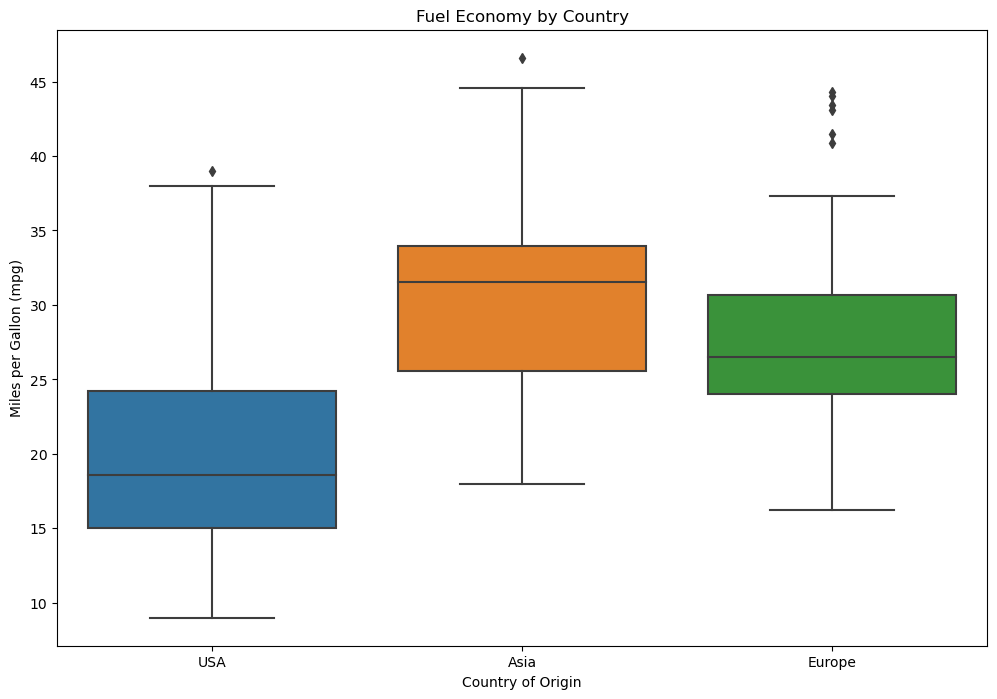

          25%    50%     75%    iqr
origin                             
Asia    25.55  31.55  33.950  8.400
Europe  24.00  26.50  30.650  6.650
USA     15.00  18.55  24.225  9.225

Summary statistics for USA:
count    250.00000
mean      20.15120
std        6.47897
min        9.00000
25%       15.00000
50%       18.55000
75%       24.22500
max       39.00000
Name: mpg, dtype: float64

Summary statistics for Asia:
count    78.000000
mean     30.366667
std       6.083268
min      18.000000
25%      25.550000
50%      31.550000
75%      33.950000
max      46.600000
Name: mpg, dtype: float64

Summary statistics for Europe:
count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: mpg, dtype: float64


In [71]:

# Create a box plot
plt.figure(figsize=(12, 8))
countries_order = ['USA', 'Asia', 'Europe']
sns.boxplot(x='origin', y='mpg', data=df,order=countries_order)
plt.title('Fuel Economy by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Miles per Gallon (mpg)')
plt.show()


#Making sure the plot is correct

# Group data by 'origin'
grouped_data = df.groupby('origin')['mpg']

# Calculate quartiles and IQR for each group
quartiles = grouped_data.describe(percentiles=[.25, .5, .75])
quartiles['iqr'] = quartiles['75%'] - quartiles['25%']

# Display quartiles and IQR as text
print(quartiles[['25%', '50%', '75%', 'iqr']])

# Calculate and print the summary statistics for each country
for country in countries_order:
    country_data = df[df['origin'] == country]['mpg']
    print(f"\nSummary statistics for {country}:\n{country_data.describe()}")





# 5- plot histograms for 'acceleration,' 'horsepower,' and 'mpg'


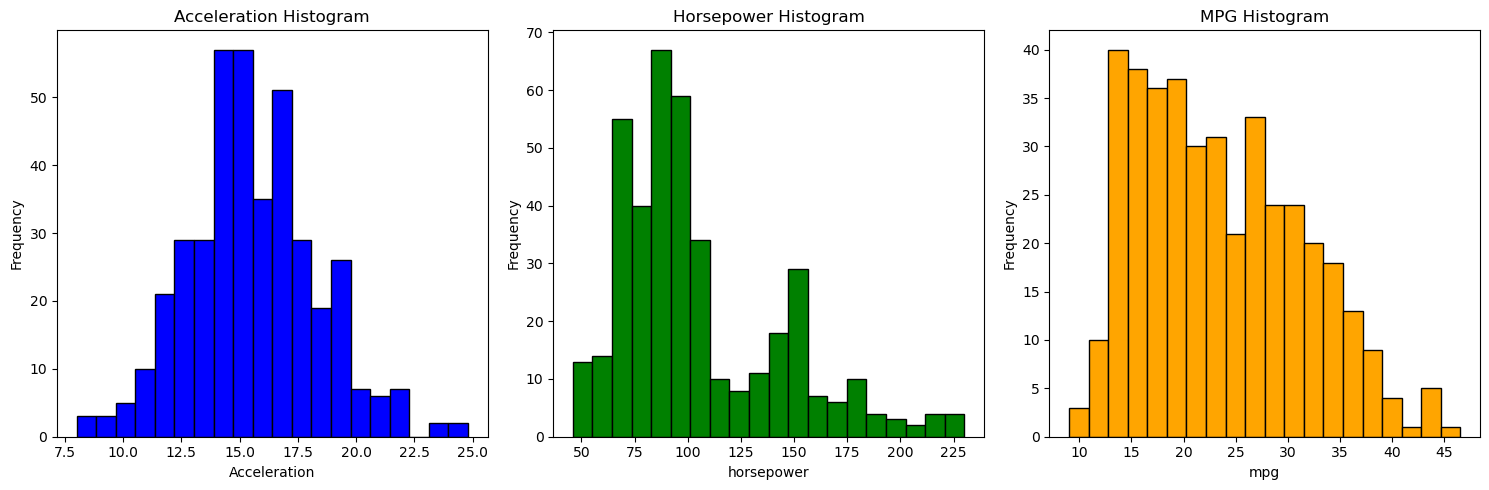

In [72]:

subset_df = df[['acceleration', 'horsepower', 'mpg']]

# Plot histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(subset_df['acceleration'], bins=20, color='blue', edgecolor='black')
plt.title('Acceleration Histogram')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(subset_df['horsepower'], bins=20, color='green', edgecolor='black')
plt.title('Horsepower Histogram')
plt.xlabel('horsepower')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(subset_df['mpg'], bins=20, color='orange', edgecolor='black')
plt.title('MPG Histogram')
plt.xlabel('mpg')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Based on the  histograms, the distribution of acceleration is most similar to a Gaussian. It is bell-shaped and symmetrical, with a single peak in the center.

The histograms of horsepower and mpg are both skewed, with longer tails on one side.

Acceleration is affected by a number of factors, including engine power, weight, and aerodynamics. These factors are all 
distributed in a normal way, which would result in a normal distribution of acceleration.


# 6- Using Pearson's Second Coefficient of Skewness 


skewness: measurement of the distortion of symmetrical distribution or asymmetry in a data set, extreme values in one side of distribution

measure of skewness: Pearson's second skewness coefficient 

Pearson's second skewness coefficient: calculated by multiplying the difference between the mean and median, multiplied by three. The result is divided by the standard deviation..... S= 3*(mean-median)/standard deviation

we need to calcultae it for the 3 features : acceleration,horsepower, and mpg.So we need to find mean, median, and standard deviation for each.


In [73]:
# Calculate mean, median, and standard deviation for acceleration
acceleration_mean = df['acceleration'].mean()
acceleration_median = df['acceleration'].median()
acceleration_sd = df['acceleration'].std()

print(f"\nAcceleration Mean: {acceleration_mean}")
print(f"Acceleration Median: {acceleration_median}")
print(f"Acceleration Standard Deviation: {acceleration_sd}")
print("S= 3*(mean-median)/standard deviation")
print( "= 3*(accelerationMean-accelerationMedian)/acceleration_sd =", 3*(acceleration_mean-acceleration_median)/acceleration_sd )
S1=3*(acceleration_mean-acceleration_median)/acceleration_sd 

if S1>0:
    print("pos+ skewed to rigt")
elif S1<0:
    print("neg+ skewed to left")
else:
    print("not skewed")
    
    
# Calculate mean, median, and standard deviation for horsepower
horsepower_mean = df['horsepower'].mean()
horsepower_median = df['horsepower'].median()
horsepower_sd = df['horsepower'].std()

print(f"\nHorsepower Mean: {horsepower_mean}")
print(f"Horsepower Median: {horsepower_median}")
print(f"Horsepower Standard Deviation: {horsepower_sd}")
print("S= 3*(mean-median)/standard deviation")
print( "= 3*(horsepowerMean-horsepowerMedian)/horsepower_sd =", 3*(horsepower_mean-horsepower_median)/horsepower_sd )
S2=3*(horsepower_mean-horsepower_median)/horsepower_sd

if S2>0:
    print("pos+ skewed to rigt")
elif S2<0:
    print("neg+ skewed to left")
else:
    print("not skewed")

# Calculate mean, median, and standard deviation for MPG
mpg_mean = df['mpg'].mean()
mpg_median = df['mpg'].median()
mpg_sd = df['mpg'].std()

print(f"\nMPG Mean: {mpg_mean}")
print(f"MPG Median: {mpg_median}")
print(f"MPG Standard Deviation: {mpg_sd}")
print("S= 3*(mean-median)/standard deviation")
print( "= 3*(mpgMean-mpgMedian)/mpg_sd =", 3*(mpg_mean-mpg_median)/mpg_sd )
S3=3*(mpg_mean-mpg_median)/mpg_sd;

if S3>0:
    print("pos+ skewed to rigt")
elif S3<0:
    print("neg+ skewed to left")
else:
    print("not skewed")



Acceleration Mean: 15.568090452261291
Acceleration Median: 15.5
Acceleration Standard Deviation: 2.7576889298126757
S= 3*(mean-median)/standard deviation
= 3*(accelerationMean-accelerationMedian)/acceleration_sd = 0.07407338607902728
pos+ skewed to rigt

Horsepower Mean: 104.30402010050251
Horsepower Median: 93.5
Horsepower Standard Deviation: 38.22262486810868
S= 3*(mean-median)/standard deviation
= 3*(horsepowerMean-horsepowerMedian)/horsepower_sd = 0.8479810168283543
pos+ skewed to rigt

MPG Mean: 23.514572864321615
MPG Median: 23.0
MPG Standard Deviation: 7.815984312565782
S= 3*(mean-median)/standard deviation
= 3*(mpgMean-mpgMedian)/mpg_sd = 0.19750789295764096
pos+ skewed to rigt


# 6- Other Method
 using ready method .skew() 
 The .skew() method in Pandas calculates skewness using Pearson's first coefficient of skewness


In [74]:
for i, column in enumerate(subset_df.columns, 1):

    # Calculate skewness and kurtosis
    skewness = subset_df[column].skew()
    kurt = subset_df[column].kurt()

    print(f"{column} Skewness: {skewness:.2f}")
    

acceleration Skewness: 0.28
horsepower Skewness: 1.11
mpg Skewness: 0.46


If skewness is close to 0, the distribution is close to normal. 
Negative skewness ...>  distribution skewed to the left
positive skewness ...> distribution  skewed to the right.

results:
acceleration Skewness: 0.28
horsepower Skewness: 1.11
mpg Skewness: 0.46


Variable      Skewness  Interpretation
acceleration  0.28      Slightly skewed to the right(the closest to a normal distribution)
horsepower    1.11      the highest positive skewness
mpg           0.46       moderate rightward skew

Among the three variables, acceleration has skewness closest to 0, which is 0.28. Hence, acceleration is closest to being normally distributed. 
Horsepower: the distribution  is likely to be more heavily skewed to the right, with a longer or fatter tail on the right side.
MPG:  the distribution  may have a somewhat longer or fatter tail on the right side.


# # 7-  'horsepower' vs 'mpg'  & correlation coefficient 


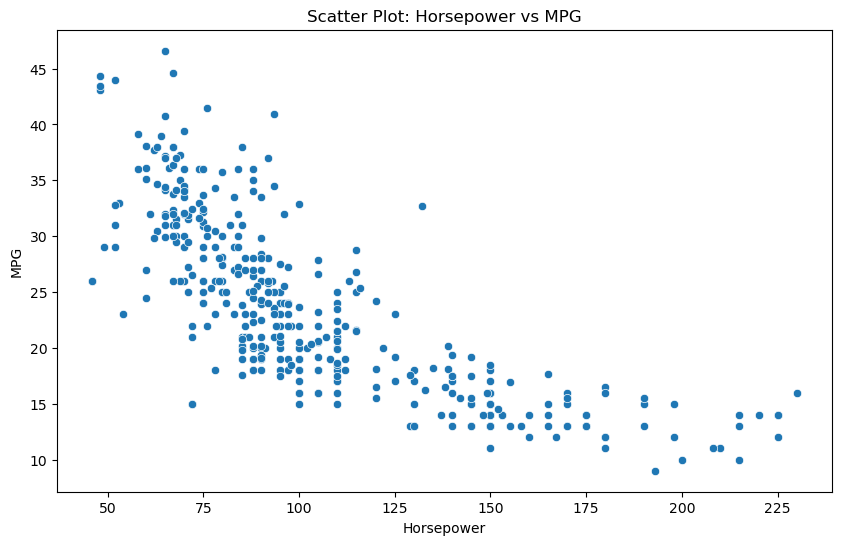

Correlation Coefficient: -0.7734532045742155


In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

correlation_coefficient = df['horsepower'].corr(df['mpg'])
print(f"Correlation Coefficient: {correlation_coefficient}")


correlation coefficient ranges from -1 to 1. 
If it's close to 1, it indicates a strong positive correlation, while if it's close to -1, it indicates a strong negative correlation. If it's close to 0, there may not be a significant linear correlation.

Correlation Coefficient: -0.7734532045742155
it's close to -1, it indicates a strong negative correlation.

# 8-  The closed form solution of linear regression 

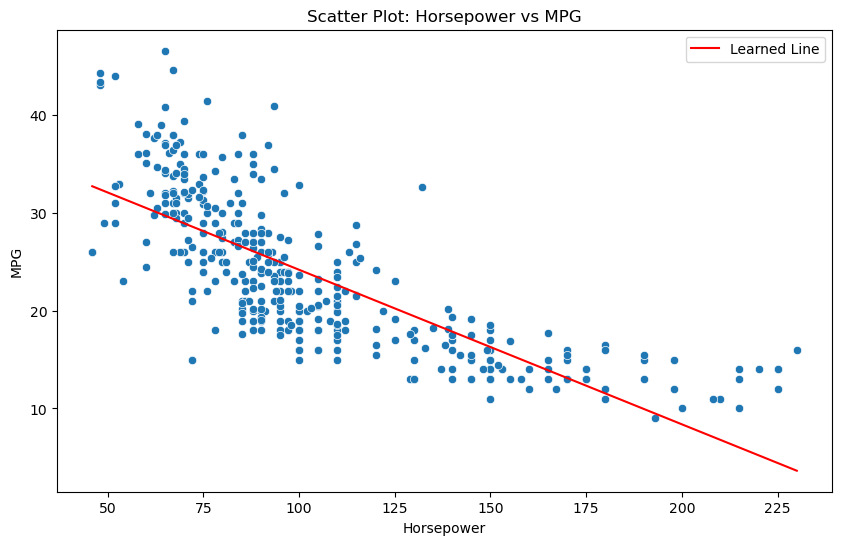

In [76]:
# Add x0=1 for the intercept
df['x0'] = 1

# Extract features (X) and target variable (y)
X = df[['x0', 'horsepower']].values
y = df['mpg'].values

# Calculate the closed-form solution using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract slope and intercept from theta
intercept, slope = theta[0], theta[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Plot the learned line
x_range = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_pred = intercept + slope * x_range
plt.plot(x_range, y_pred, color='red', label='Learned Line')

plt.legend()
plt.show()


The code calculates the closed-form solution using the normal equation (theta = (X^T X)^(-1) X^T y) and then extracts the slope and intercept from the resulting theta vector.


# ADDITIONAL PART
Here, the 'horsepower' feature is transformed using the natural logarithm (np.log). 
The linear regression is then performed on the transformed feature. 
applying a logarithmic transformation does not change the nature of the regression as a linear model. 
It's a common technique used to capture non-linear relationships within the framework of linear regression.


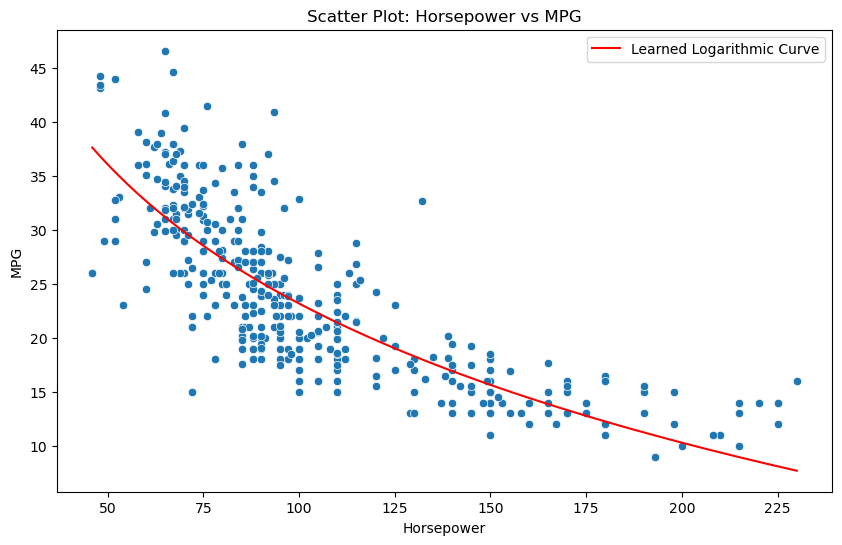

In [77]:

# Add x0=1 for the intercept
df['x0'] = 1

# Extract features (X) and target variable (y)
X = df[['x0', 'horsepower']].values
y = df['mpg'].values

# Apply logarithmic transformation to 'horsepower'
X[:, 1] = np.log(X[:, 1])

# Calculate the closed-form solution using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract intercept and slope from theta
intercept, slope = theta[0], theta[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Plot the learned curve
x_range = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
x_range_log = np.log(x_range)
y_pred = intercept + slope * x_range_log
plt.plot(x_range, y_pred, color='red', label='Learned Logarithmic Curve')

plt.legend()
plt.show()


# 9- polynomial regression model with a degree of 2


## METHOD 1 :
automated approach is taken using the PolynomialFeatures class from  scikit-learn. This class generates polynomial features up to a specified degree, in this case, degree 2. It automatically adds the quadratic term, and then a linear regression model is trained on the extended feature matrix.

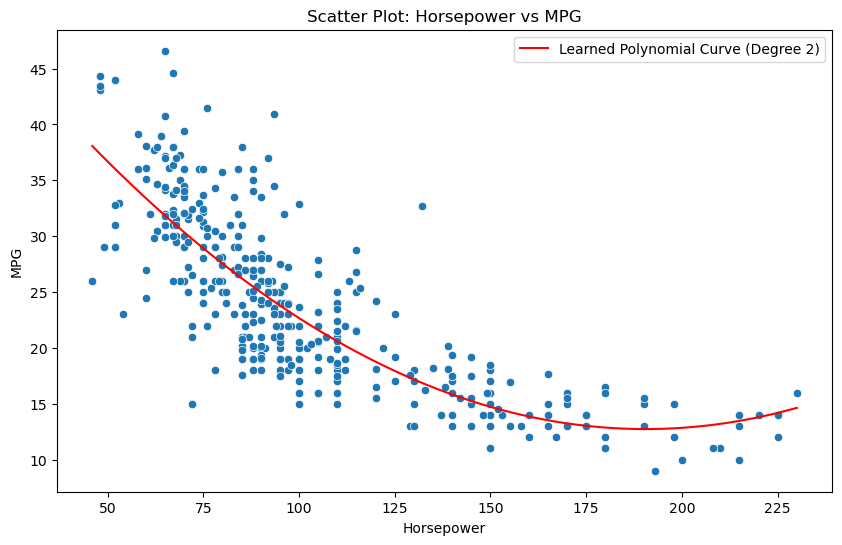

In [78]:
# Add x0=1 for the intercept
df['x0'] = 1

# Extract features (X) and target variable (y)
X = df[['x0', 'horsepower']].values
y = df['mpg'].values

# Create polynomial features with degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X[:, 1].reshape(-1, 1))

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Plot the learned polynomial curve
x_range = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_pred_poly = model.predict(x_range_poly)
plt.plot(x_range, y_pred_poly, color='red', label='Learned Polynomial Curve (Degree 2)')

plt.legend()
plt.show()


## 9- polynomial regression model with a degree of 2 (METHOD 2) :
quadratic term is manually added to the feature matrix.
This method explicitly calculates the coefficients using the normal equation.

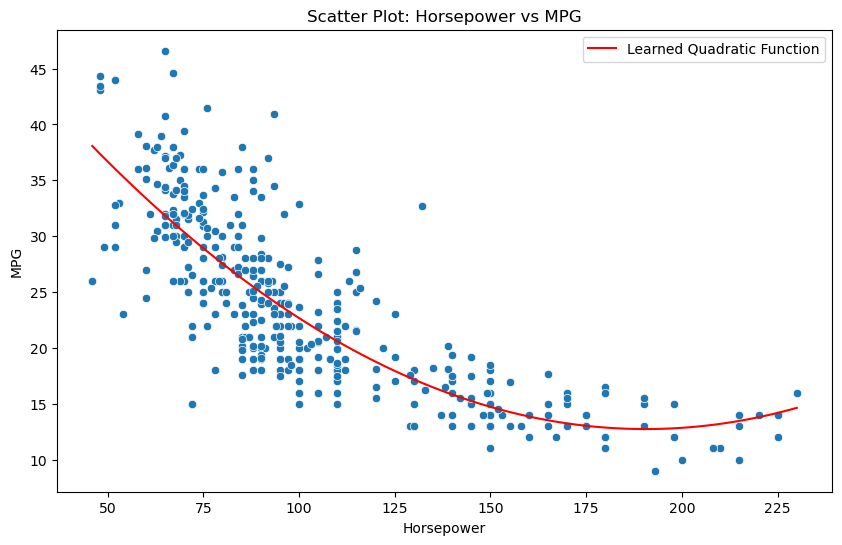

In [79]:

# Add x0=1 and x2=horsepower^2 for the intercept and quadratic term
df['x0'] = 1
df['x2'] = df['horsepower'] ** 2

# Extract features (X) and target variable (y)
X = df[['x0', 'horsepower', 'x2']].values
y = df['mpg'].values

# Calculate the closed-form solution using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y
# Extract coefficients from theta
intercept, linear_coeff, quadratic_coeff = theta[0], theta[1], theta[2]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Plot the learned quadratic function
x_range = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_pred = intercept + linear_coeff * x_range + quadratic_coeff * x_range**2
plt.plot(x_range, y_pred, color='red', label='Learned Quadratic Function')

plt.legend()
plt.show()


# PART 10 followed by Addional Part ("Cost vs Iteration" curve or "Learning Curve")

Iteration 100: Cost 0.032165328158982334, Weights [0.23865162 0.04114177]
Iteration 200: Cost 0.024022496489995618, Weights [0.32431391 0.03327535]
Iteration 300: Cost 0.02217817972652007, Weights [0.35931862 0.01008666]
Iteration 400: Cost 0.0210891633021473, Weights [ 0.37737944 -0.01736103]
Iteration 500: Cost 0.020148747482338625, Weights [ 0.38961    -0.04545408]
Iteration 600: Cost 0.019286121018398977, Weights [ 0.39968018 -0.07303129]
Iteration 700: Cost 0.01848897758555448, Weights [ 0.40880785 -0.09973805]
Iteration 800: Cost 0.0177517039956379, Weights [ 0.41740294 -0.12548437]
Iteration 900: Cost 0.017069733954493457, Weights [ 0.42560896 -0.15026634]
Iteration 1000: Cost 0.01643891152774277, Weights [ 0.43348135 -0.17410747]
Iteration 1100: Cost 0.015855399833992256, Weights [ 0.44104621 -0.19703931]
Iteration 1200: Cost 0.015315650550414539, Weights [ 0.44831972 -0.21909519]
Iteration 1300: Cost 0.014816381559102388, Weights [ 0.45531444 -0.2403081 ]
Iteration 1400: Cost 

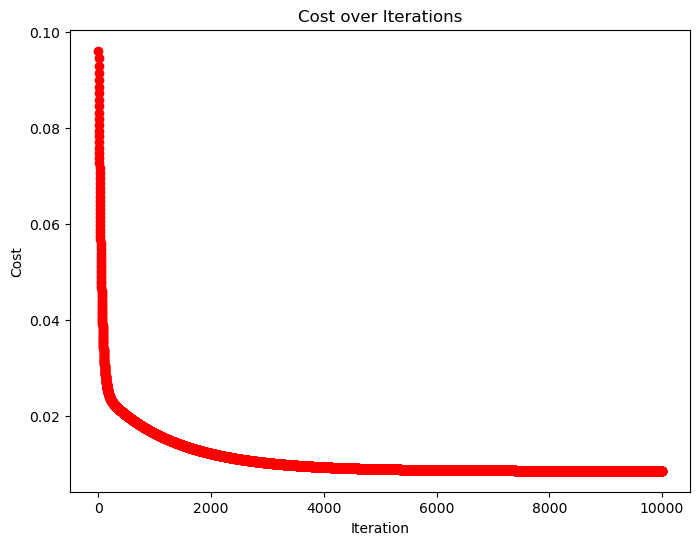

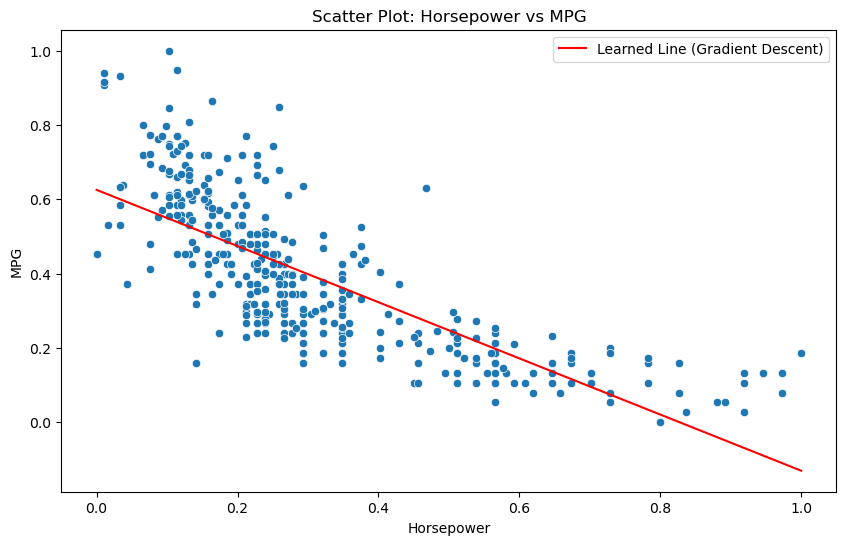

Final Weights: Intercept = 0.6253512264412475, Slope = -0.756008679365019


In [80]:
horsepower_data = df['horsepower'].values.reshape(-1, 1)
mpg_data = df['mpg'].values.reshape(-1, 1)

# Min-max normalization for both 'horsepower' and 'mpg'
scaler_horsepower = MinMaxScaler()
scaler_mpg = MinMaxScaler()

df['horsepower'] = scaler_horsepower.fit_transform(horsepower_data)
df['mpg'] = scaler_mpg.fit_transform(mpg_data)

# Add x0=1 for the intercept
df['x0'] = 1

# Extract features (X) and target variable (y)
X = df[['x0', 'horsepower']].values
y = df['mpg'].values

# Initialize parameters (slope and intercept)
theta = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 10000

# Lists to store costs and weights for visualization
costs = []
weights = []

# Gradient Descent
for i in range(num_iterations):
    # Calculate predictions
    predictions = X @ theta
    
    # Calculate errors
    errors = predictions - y
    
    # Update parameters
    theta = theta - (learning_rate / len(y)) * (X.T @ errors)

    # Calculate cost
    cost = np.sum(errors ** 2) / (2 * len(y))
    costs.append(cost)

    # Store weights for visualization
    weights.append(theta.copy())

    # Printing the parameters for each 100th iteration
    if (i + 1) % 100 == 0:
        print(f"Iteration {i + 1}: Cost {cost}, Weights {theta}")

# Visualizing the cost over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, i + 2), costs, marker='o', color='red')
plt.title("Cost over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Extract slope and intercept from the final theta
intercept, slope = theta[0], theta[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Plot the learned line
x_range = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_pred = intercept + slope * x_range
plt.plot(x_range, y_pred, color='red', label='Learned Line (Gradient Descent)')

plt.legend()
plt.show()

# Print final weights
print(f'Final Weights: Intercept = {intercept}, Slope = {slope}')

# The version of the code above Adding the stopping threshold condition

Iteration 100: Cost 0.032165328158982334, Weights [0.23865162 0.04114177]
Iteration 200: Cost 0.024022496489995607, Weights [0.32431391 0.03327535]
Iteration 300: Cost 0.022178179726520062, Weights [0.35931862 0.01008666]
Iteration 400: Cost 0.021089163302147294, Weights [ 0.37737944 -0.01736103]
Iteration 500: Cost 0.020148747482338622, Weights [ 0.38961    -0.04545408]
Iteration 600: Cost 0.019286121018398966, Weights [ 0.39968018 -0.07303129]
Iteration 700: Cost 0.018488977585554473, Weights [ 0.40880785 -0.09973805]
Iteration 800: Cost 0.017751703995637892, Weights [ 0.41740294 -0.12548437]
Iteration 900: Cost 0.017069733954493446, Weights [ 0.42560896 -0.15026634]
Iteration 1000: Cost 0.016438911527742763, Weights [ 0.43348135 -0.17410747]
Iteration 1100: Cost 0.01585539983399225, Weights [ 0.44104621 -0.19703931]
Iteration 1200: Cost 0.015315650550414532, Weights [ 0.44831972 -0.21909519]
Iteration 1300: Cost 0.014816381559102384, Weights [ 0.45531444 -0.2403081 ]
Iteration 1400:

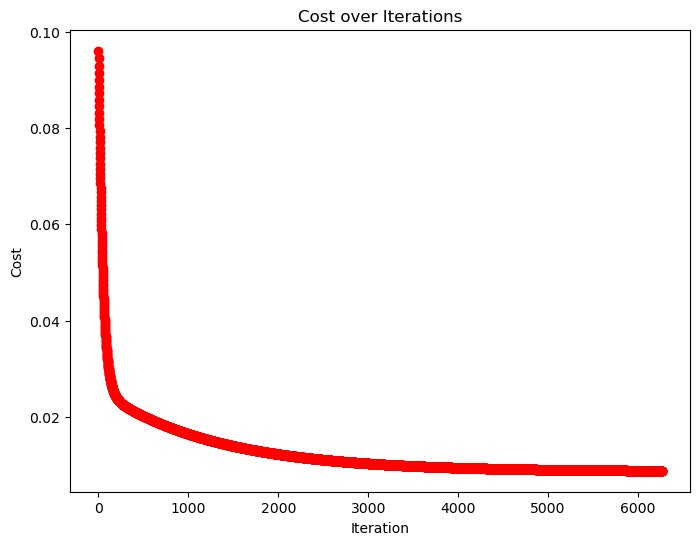

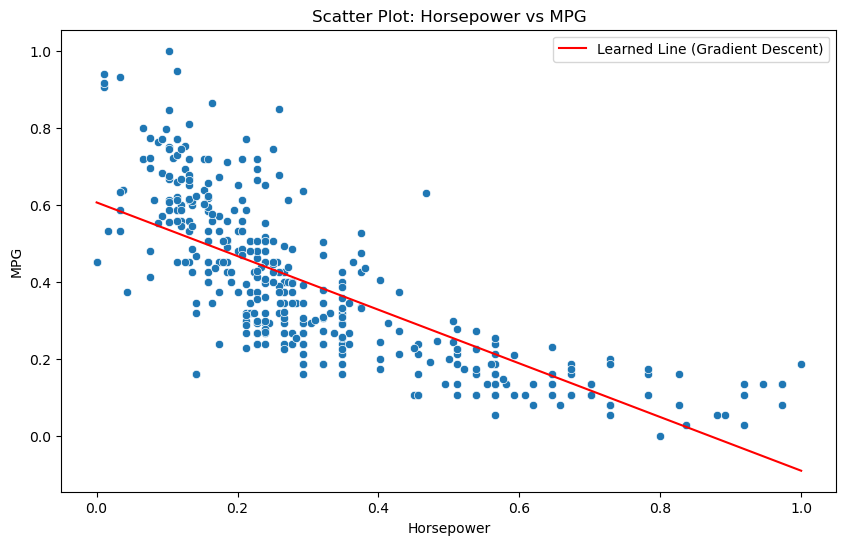

Final Weights: Intercept = 0.6058909417901508, Slope = -0.6969879691787425


In [81]:

horsepower_data = df['horsepower'].values.reshape(-1, 1)
mpg_data = df['mpg'].values.reshape(-1, 1)

# Min-max normalization for both 'horsepower' and 'mpg'
scaler_horsepower = MinMaxScaler()
scaler_mpg = MinMaxScaler()

df['horsepower'] = scaler_horsepower.fit_transform(horsepower_data)
df['mpg'] = scaler_mpg.fit_transform(mpg_data)

# Add x0=1 for the intercept
df['x0'] = 1

# Extract features (X) and target variable (y)
X = df[['x0', 'horsepower']].values
y = df['mpg'].values

# Initialize parameters (slope and intercept)
theta = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 10000
stopping_threshold = 1e-7

# Lists to store costs and weights for visualization
costs = []
weights = []

# Gradient Descent
for i in range(num_iterations):
    # Calculate predicions
    predictions = X @ theta
    
    # Calculate errors
    errors = predictions - y
    
    # Update parameters
    theta = theta - (learning_rate / len(y)) * (X.T @ errors)

    # Calculate cost
    cost = np.sum(errors ** 2) / (2 * len(y))
    costs.append(cost)

    # Store weights for visualization
    weights.append(theta.copy())

    # Printing the parameters for each 100th iteration
    if (i + 1) % 100 == 0:
        print(f"Iteration {i + 1}: Cost {cost}, Weights {theta}")

    # Check for convergence based on the stopping threshold
    if i > 0 and abs(costs[i - 1] - cost) <= stopping_threshold:
        break

# Visualizing the cost over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, i + 2), costs, marker='o', color='red')
plt.title("Cost over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Extract slope and intercept from the final theta
intercept, slope = theta[0], theta[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Plot the learned line
x_range = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_pred = intercept + slope * x_range
plt.plot(x_range, y_pred, color='red', label='Learned Line (Gradient Descent)')

plt.legend()
plt.show()

# Print final weights
print(f'Final Weights: Intercept = {intercept}, Slope = {slope}')
